# BMI Project 2 - English
This notebook is for assistance with the coding of some questions in the project.
The sections are marked with the corresponding question in the project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions.

#### Initialize Python Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Read Data

In [3]:
# Path to file (insert your own path)
file_path = '/Users/rashe/OneDrive/Desktop/MedTech/5. semester/02402 Statistics/Projects/bmi2/bmi2_data.csv'

# Load data
D = pd.read_csv(file_path,sep=';')
# D

# Add log-transformed BMI
D['logbmi'] = np.log(D['bmi'])
# D


#### Scatter plots

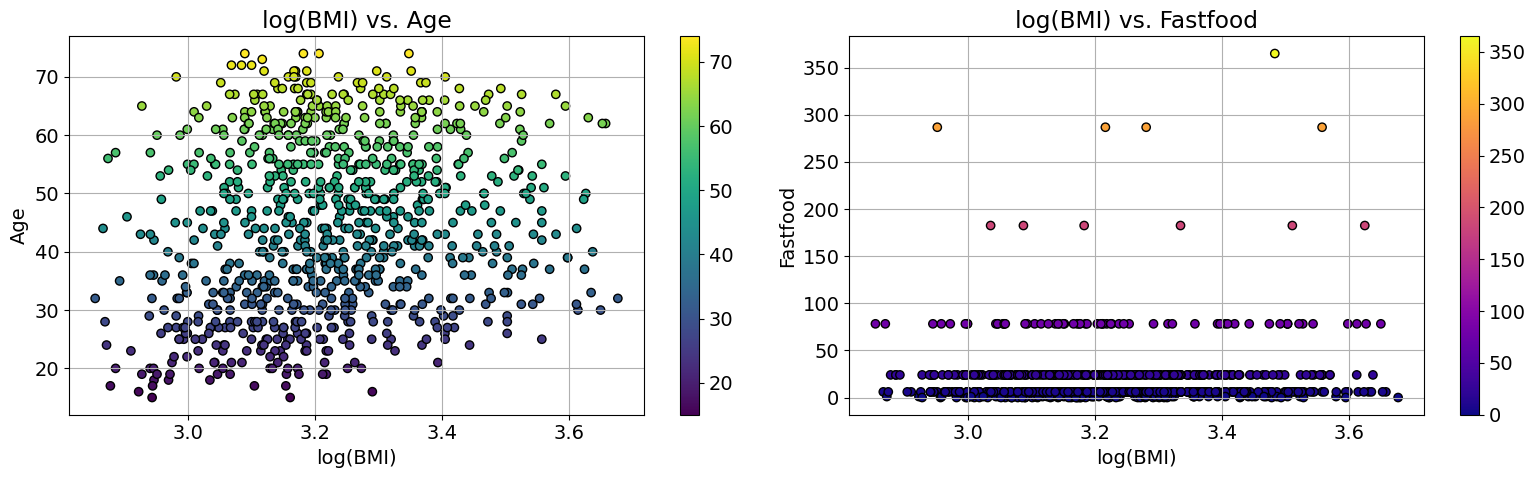

In [4]:
Age = D['age']
Fastfood = D['fastfood']
logBMI = np.log(D['bmi'])

# Create two subplots side by side:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# 1. Scatter plot for log(BMI) vs. Age:
scatter1 = ax1.scatter(logBMI, Age, c=Age, cmap='viridis', edgecolor='black')
ax1.set_title("log(BMI) vs. Age")
ax1.set_xlabel("log(BMI)")
ax1.set_ylabel("Age")
ax1.grid(True)
fig.colorbar(scatter1, ax=ax1)

# 2. Scatter plot for log(BMI) vs. Fastfood:
scatter2 = ax2.scatter(logBMI, Fastfood, c=Fastfood, cmap='plasma', edgecolor='black')
ax2.set_title("log(BMI) vs. Fastfood")
ax2.set_xlabel("log(BMI)")
ax2.set_ylabel("Fastfood")
ax2.grid(True)
fig.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()


#### Histograms

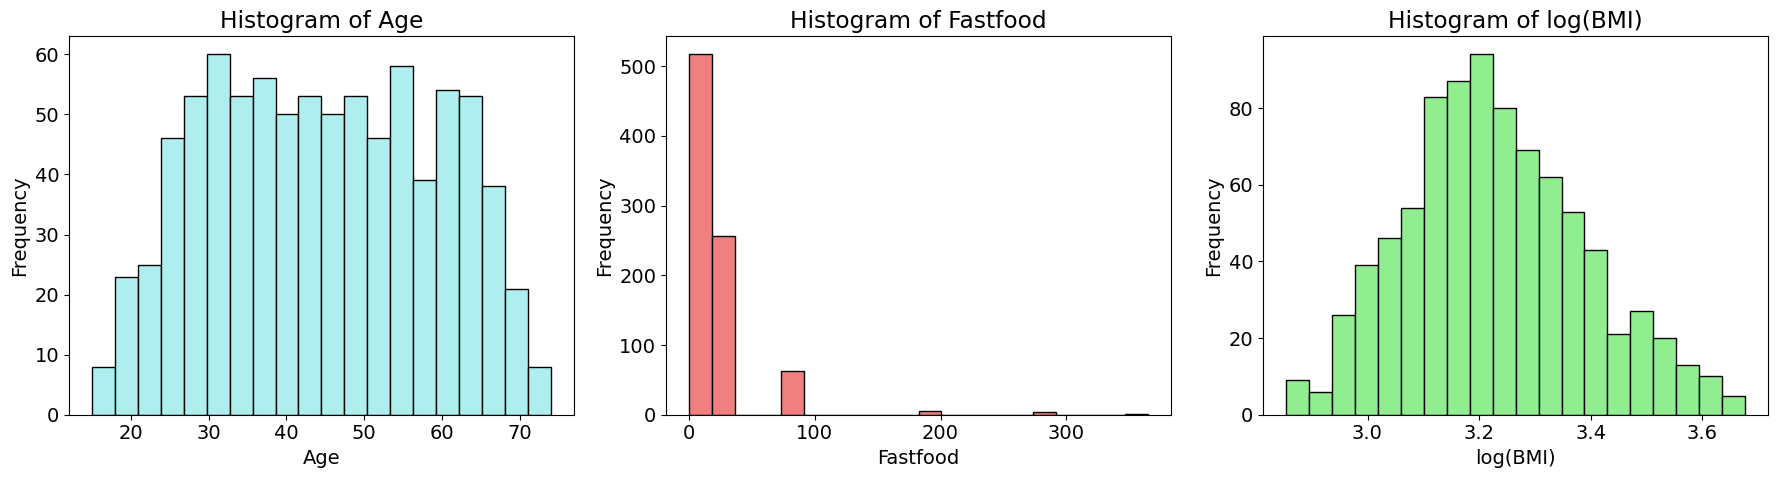

In [5]:
# Create subplots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 1. Histogram for Age:
ax1.hist(Age, bins=20, edgecolor="black", color="paleturquoise", density=False)
ax1.set_title("Histogram of Age")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")


# 2. Histogram for Fastfood Consumption:
ax2.hist(Fastfood, bins=20, edgecolor="black", color="lightcoral", density=False)
ax2.set_title("Histogram of Fastfood")
ax2.set_xlabel("Fastfood")
ax2.set_ylabel("Frequency")


# 3. Histogram for log(BMI):
ax3.hist(logBMI, bins=20, edgecolor="black", color="lightgreen", density=False)
ax3.set_title("Histogram of log(BMI)")
ax3.set_xlabel("log(BMI)")
ax3.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Boxplots

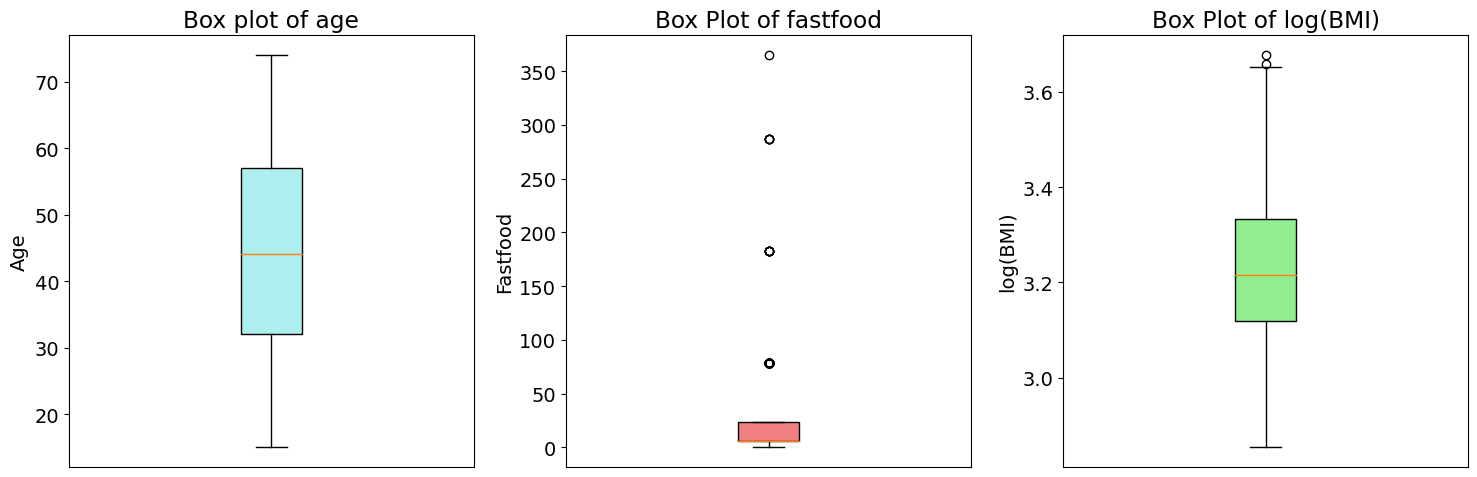

In [7]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# 1. Box plot for Age
ax1.boxplot(Age, vert=True, patch_artist=True, boxprops=dict(facecolor="paleturquoise"))
ax1.set_title("Box plot of age")
ax1.set_ylabel("Age")
ax1.set_xticks([])

# 2. Box plot for Fastfood Consumption
ax2.boxplot(Fastfood, vert=True, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
ax2.set_title("Box Plot of fastfood")
ax2.set_ylabel("Fastfood")
ax2.set_xticks([])

# 3. Box plot for log(BMI)
ax3.boxplot(logBMI, vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
ax3.set_title("Box Plot of log(BMI)")
ax3.set_ylabel("log(BMI)")
ax3.set_xticks([])

# Display the plots
plt.tight_layout()
plt.show()

#### Simple summary of data

In [8]:
display(D.describe())

,id,bmi,age,fastfood,logbmi
count,847.000000,847.000000,847.000000,847.000000,847.000000
mean,424.000000,25.573024,44.622196,19.044628,3.228495
std,244.652134,4.217671,14.532799,32.651239,0.160372
min,1.000000,17.361111,15.000000,0.000000,2.854233
25%,212.500000,22.637770,32.000000,6.000000,3.119620
50%,424.000000,24.930748,44.000000,6.000000,3.216102
75%,635.500000,28.039151,57.000000,24.000000,3.333602
max,847.000000,39.519741,74.000000,365.000000,3.676800


In [20]:
# Convert to LaTeX:
Tbl = D.describe().T.round(2)
Tbl_latex = Tbl.to_latex(float_format="%.2f")
# print(Tbl_latex)

#### Split the data
Save seven observations for testing only. Use everything else for parameter estimation.

In [10]:
# Subset containing the first 840 observations (for model estimation)
D_model = D[D['id'] <= 840]

# Subset containing the last 7 observations (for validation)
D_test = D[D['id'] >= 841]

#### c) Fitting the model - Estimating parameters

In [11]:
# Estimate multiple linear regression model
fit = smf.ols('logbmi ~ age + fastfood', data = D_model).fit()
print(fit.summary(slim = True))

# Residual standard deviation (error standard deviation estimate)
sigma = np.sqrt(fit.mse_resid) # fit.mse_resid or fit.scale
print(f"Estimated residual variance (σ̂²) = {sigma:.6f}")

# The number of degrees of freedom
df = 840 - (2 + 1)
print(f'Degree of freedom: {df}')

#--------------------------- The estimated residual variance
X = fit.model.exog
y = fit.model.endog
n = len(y)

# Calculate beta coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate residuals and standard error of the residuals
e = y - X @ beta
s = np.sqrt(np.sum(e**2) / (n - X.shape[1]))

# Calculate variance-covariance matrix and extract standard errors
Vbeta = s**2 * np.linalg.inv(X.T @ X)
se_beta = np.sqrt(np.diag(Vbeta))

# Display standard errors with coefficient names
std_error_table = pd.DataFrame(se_beta, index=fit.params.index, columns=["Std.Error"])
print(std_error_table)

                            OLS Regression Results                            
Dep. Variable:                 logbmi   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
No. Observations:                 840   F-statistic:                     19.66
Covariance Type:            nonrobust   Prob (F-statistic):           4.53e-09
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1124      0.019    160.835      0.000       3.074       3.150
age            0.0024      0.000      6.104      0.000       0.002       0.003
fastfood       0.0005      0.000      3.119      0.002       0.000       0.001

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Estimated residual variance (σ̂²) = 0.157339
Degree of freedom: 837
           Std.Error
Intercept   0.019352


#### For more decimals

In [12]:
X = fit.model.exog  # Design matrix including intercept and predictors (age and fastfood)
y = fit.model.endog  # Dependent variable logbmi

# Number of observations
n = len(y)

# Beta calculation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Error term and standard error calculation
e = y - X @ beta  # Residuals
s = np.sqrt(np.sum(e**2) / (n - X.shape[1]))  # Standard error of the residuals
Vbeta = s**2 * np.linalg.inv(X.T @ X)  # Variance-covariance matrix
se_beta = np.sqrt(np.diag(Vbeta))  # Standard errors of coefficients

# t-statistic and p-value
# t_obs = beta / se_beta
# p_value = 2 * (1 - stats.t.cdf(np.abs(t_obs), df=n - X.shape[1]))

# Organizing results into a table
analysis_table = np.column_stack((beta, se_beta))

# Assigning column and row names
col_names = ["Estimates", "Std.Error"]
row_names = fit.params.index  # This will give the names of coefficients: Intercept, age, fastfood

# Display table
result_table = pd.DataFrame(analysis_table, index=row_names, columns=col_names)
print(result_table)


           Estimates  Std.Error
Intercept   3.112430   0.019352
age         0.002374   0.000389
fastfood    0.000540   0.000173


#### d) Model validation

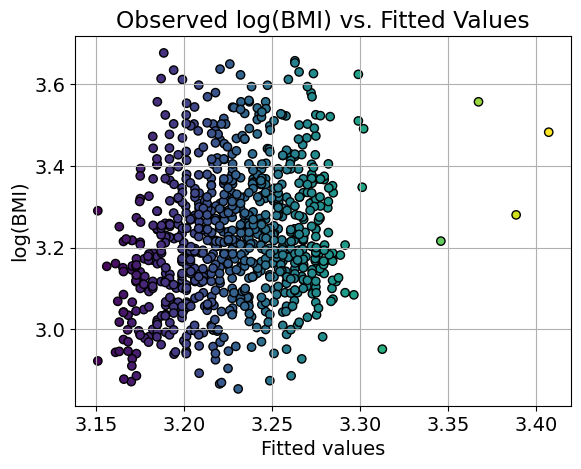

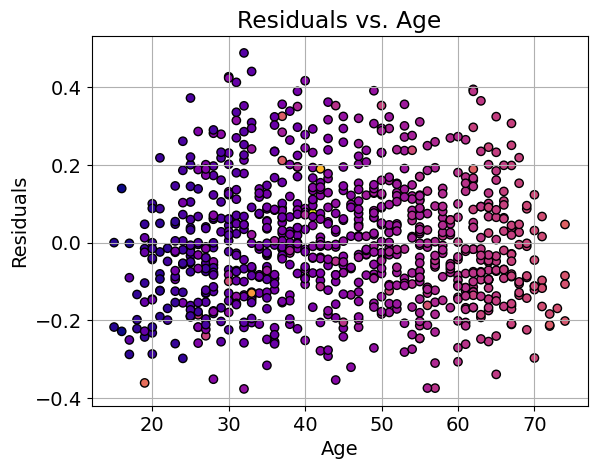

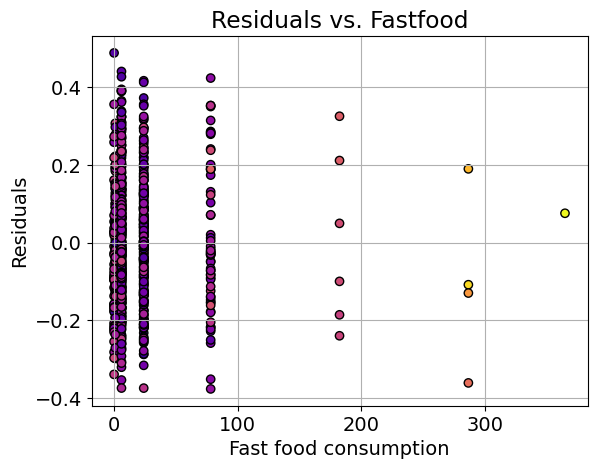

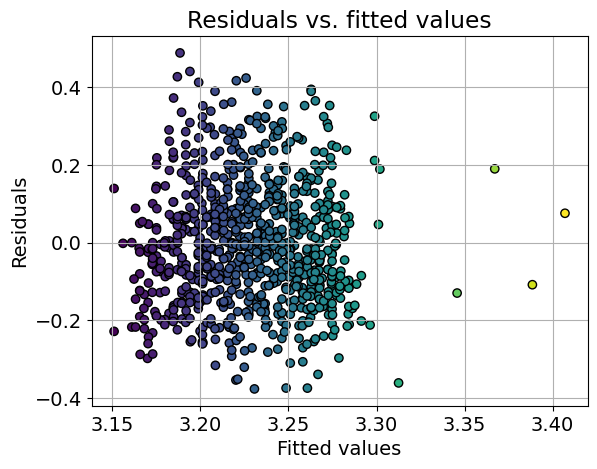

c:\Users\rashe\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


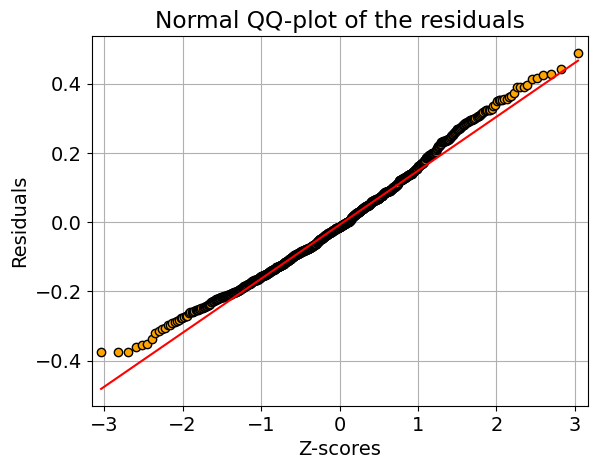

In [13]:
# Observations against fitted values
plt.scatter(fit.fittedvalues, D_model.logbmi, c=fit.fittedvalues, cmap='viridis', edgecolor='black')
plt.xlabel("Fitted values")
plt.ylabel("log(BMI)")
plt.title("Observed log(BMI) vs. Fitted Values")
plt.grid(True)
plt.show()


# Residuals against each of the explanatory variables
plt.scatter(D_model.age, fit.resid, c=fit.fittedvalues, cmap='plasma', edgecolor='black')    # Age
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Residuals vs. Age")
plt.grid(True)
plt.show()

plt.scatter(D_model.fastfood, fit.resid, c=fit.fittedvalues, cmap='plasma', edgecolor='black')  # Fastfood
plt.xlabel("Fast food consumption")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fastfood")
plt.grid(True)
plt.show()

# Residuals against fitted values
plt.scatter(fit.fittedvalues, fit.resid, c=fit.fittedvalues, cmap='viridis', edgecolor='black')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. fitted values")
plt.grid(True)
plt.show()


# Normal QQ-plot of the residuals
sm.qqplot(fit.resid, line='q', color='purple', markerfacecolor='orange', markeredgecolor='black')
plt.ylabel("Residuals")
plt.xlabel("Z-scores")
plt.title("Normal QQ-plot of the residuals")
plt.grid(True)
plt.show()

#### e) Confidence interval

In [27]:
# Confidence intervals for the model coefficients
con_interval = fit.conf_int(alpha=0.05)
print(con_interval)

# Manual calculation of the confidence interval
alpha = 0.05
df = 837  

# Calculate the confidence coefficient
confidence_coeff = 1 - (alpha / 2)

# Calculate t-critical value
from scipy.stats import t
t_critical_value = t.ppf(confidence_coeff, df)
print(f't_critical_value: {t_critical_value}')

# Values for beta_i and standard error
beta_i = 3.1124  
se_beta_i = 0.0194

# Calculate the confidence interval
lower_bound = beta_i - t_critical_value * se_beta_i
upper_bound = beta_i + t_critical_value * se_beta_i

print(f"95% Confidence interval for beta_1: [{lower_bound}, {upper_bound}]")


                  0         1
Intercept  3.074446  3.150413
age        0.001611  0.003138
fastfood   0.000200  0.000880
t_critical_value: 1.9628022725234335
95% Confidence interval for beta_1: [3.0743216359130456, 3.1504783640869545]


#### f) Hypothesis Test

In [52]:
t_obs = (0.0024 - 0.001) / 0.000389  # the calculated t-statistic
print(f't_obs: {t_obs}')
df = 837        # degrees of freedom

# Calculate the p-value
p_value = 2 * t.sf(t_obs, df)
print("P-value:", p_value)

t_obs: 3.5989717223650377
P-value: 0.00033824976977598806


#### g) Backward selection

In [51]:
# Estimér den reducerede multiple lineære regressionsmodel kun med age
fit = smf.ols('logbmi ~ age', data=D_model).fit()
print(fit.summary())

# Hent p-værdien for 'age' koefficienten med flere decimaler
p_value_age = fit.pvalues['age']
print(f"P-value for 'age' coefficient: {p_value_age:.10f}") 

                            OLS Regression Results                            
Dep. Variable:                 logbmi   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     29.29
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           8.15e-08
Time:                        12:25:15   Log-Likelihood:                 358.20
No. Observations:                 840   AIC:                            -712.4
Df Residuals:                     838   BIC:                            -702.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1382      0.018    178.327      0.0

In [49]:
# Estimér den reducerede multiple lineære regressionsmodel kun med fastfood
fit = smf.ols('logbmi ~ fastfood', data=D_model).fit()
print(fit.summary())

# Hent p-værdien for 'fastfood' koefficienten med flere decimaler
p_value_fastfood = fit.pvalues['fastfood']
print(f"P-value for 'fastfood' coefficient: {p_value_fastfood:.10f}")

                            OLS Regression Results                            
Dep. Variable:                 logbmi   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.974
Date:                Sun, 10 Nov 2024   Prob (F-statistic):              0.160
Time:                        12:24:31   Log-Likelihood:                 344.76
No. Observations:                 840   AIC:                            -685.5
Df Residuals:                     838   BIC:                            -676.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2242      0.006    503.019      0.0

#### h) Predictions

In [17]:
# Predictions and 95% prediction intervals
final_model = fit # Insert your final model. Must be same format as "fit"
pred = final_model.get_prediction(D_test).summary_frame(alpha=0.05)

# Reset index for D_test. So we can new dataframe with observed values and predictions
D_test.reset_index(inplace=True)

# Observed values and predictions
# New dataframe
res = pd.DataFrame({'id': D_test['id'],'logbmi': D_test['logbmi'],'pred': pred['mean'],'pred_lower': pred['obs_ci_lower'],'pred_upper':pred['obs_ci_upper']})
display(res)

# Tbl_latex = res.to_latex()
# print(Tbl_latex)

,id,logbmi,pred,pred_lower,pred_upper
0,841,3.143436,3.236993,2.927972,3.546015
1,842,3.269232,3.210875,2.901802,3.519949
2,843,3.269438,3.232245,2.923231,3.541258
3,844,3.324205,3.232245,2.923231,3.541258
4,845,3.106536,3.229870,2.920857,3.538883
5,846,3.263822,3.229641,2.920601,3.538681
6,847,3.058533,3.211670,2.901898,3.521443
